In [1]:
import torch

In [2]:
torch.__version__

'2.2.2'

# Following Tutorial

In [3]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
# Load QMNIST dataset 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download='True', transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download='True', transform=transform)

# Create Data Loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Visualize the Dataset

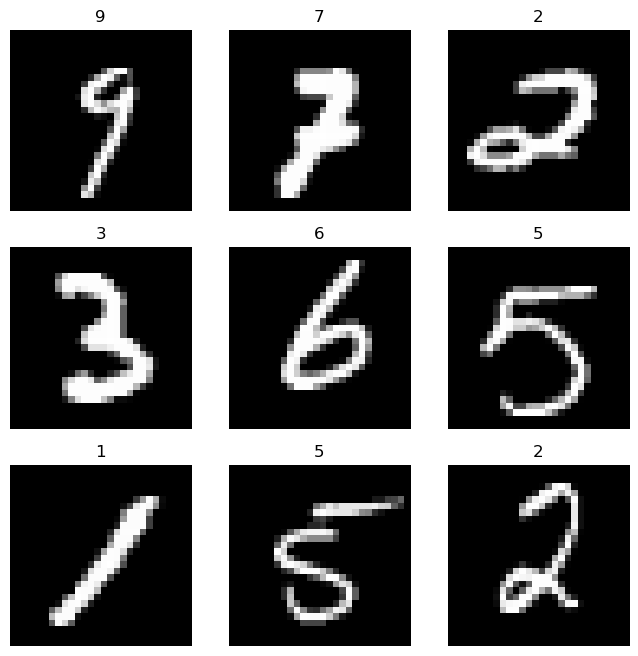

In [5]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1,cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

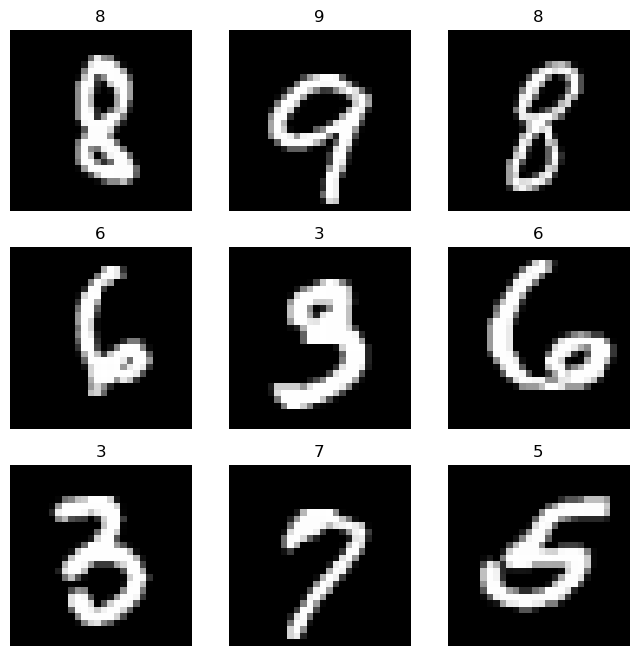

In [6]:
# test Dataset

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## Modeling NN

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = MLP()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outpus = model(inputs)
        loss = criterion(outpus, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 100 == 99:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100}')
            running_loss = 0.0
            correct = 0
            total = 0
            
print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0556920623779298
Epoch 1, Batch 200, Loss: 0.44912069872021676
Epoch 1, Batch 300, Loss: 0.3752118667960167
Epoch 1, Batch 400, Loss: 0.35129957914352417
Epoch 1, Batch 500, Loss: 0.3467361940443516
Epoch 1, Batch 600, Loss: 0.3209052826464176
Epoch 1, Batch 700, Loss: 0.2789001079648733
Epoch 1, Batch 800, Loss: 0.2676535963267088
Epoch 1, Batch 900, Loss: 0.25787740416824817
Epoch 2, Batch 100, Loss: 0.22970901150256395
Epoch 2, Batch 200, Loss: 0.21640905916690825
Epoch 2, Batch 300, Loss: 0.20729080080986023
Epoch 2, Batch 400, Loss: 0.20601989228278397
Epoch 2, Batch 500, Loss: 0.1918893662840128
Epoch 2, Batch 600, Loss: 0.19008899740874768
Epoch 2, Batch 700, Loss: 0.1624915297329426
Epoch 2, Batch 800, Loss: 0.17488610912114383
Epoch 2, Batch 900, Loss: 0.1631122048571706
Epoch 3, Batch 100, Loss: 0.1517372542992234
Epoch 3, Batch 200, Loss: 0.13904143542051314
Epoch 3, Batch 300, Loss: 0.14733837608247996
Epoch 3, Batch 400, Loss: 0.1356139817647635

In [9]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training the model
# num_epochs = 5
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     for i, data in enumerate(train_loader, 0):
#         inputs, labels = data
        
#         # Forward pass
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
        
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
        
#         # Debug: print shape of outputs and labels
#         # print(f"Output shape: {outputs.shape}, Labels shape: {labels.shape}")
        
#         # Accuracy calculation
#         _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
#         # print(f"Predicted shape: {predicted.shape}")  # Print predicted shape for debugging
        
#         # Ensure total and correct are calculated only if shapes match
#         if predicted.shape == labels.shape:
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
        
#         # Print statistics every 100 batches
#         if i % 100 == 99:
#             accuracy = 100 * correct / total  # Calculate accuracy percentage
#             print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100}, Accuracy: {accuracy:.2f}%')
#             running_loss = 0.0
#             correct = 0  # Reset correct for the next 100 batches
#             total = 0    # Reset total for the next 100 batches

# print('Finished Training')


In [10]:
# Evaluate the model and store prediction
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc1 = correct / total        
print(f"Accuracy on test set: {correct / total *100}%")

Accuracy on test set: 94.85666666666667%


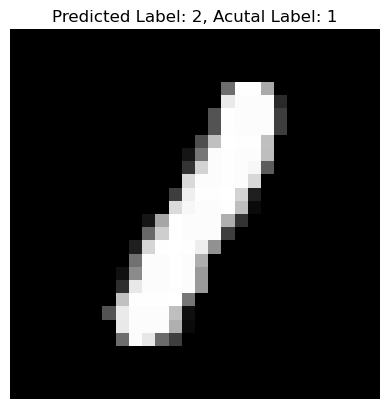

In [11]:
image, label = images[1], labels[1]

image = image.view(28, 28)
image_numpy = image.numpy()

plt.imshow(image_numpy, cmap='gray')
plt.title(f"Predicted Label: {predictions[1]}, Acutal Label: {label.item()}")
plt.axis("off")
plt.show()

# Modify the Model

In [12]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
model = MLP()

Hypothesis:

I have added one more Dense layer of 128 nodes. This would increase the accuracy, but since the accuracy of the original model is already high, the difference would not be very significant. 

# Train and evaluate the modified model

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outpus = model(inputs)
        loss = criterion(outpus, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 100 == 99:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100}')
            running_loss = 0.0
            correct = 0
            total = 0
            
print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1024345606565475
Epoch 1, Batch 200, Loss: 0.43937609866261484
Epoch 1, Batch 300, Loss: 0.4005265799164772
Epoch 1, Batch 400, Loss: 0.34075415790081026
Epoch 1, Batch 500, Loss: 0.30599621146917344
Epoch 1, Batch 600, Loss: 0.2688695778697729
Epoch 1, Batch 700, Loss: 0.2541291113942862
Epoch 1, Batch 800, Loss: 0.24743629522621632
Epoch 1, Batch 900, Loss: 0.22866396464407443
Epoch 2, Batch 100, Loss: 0.20594951190054417
Epoch 2, Batch 200, Loss: 0.18827336724847554
Epoch 2, Batch 300, Loss: 0.18626722056418657
Epoch 2, Batch 400, Loss: 0.173455670773983
Epoch 2, Batch 500, Loss: 0.1804219925031066
Epoch 2, Batch 600, Loss: 0.16080134995281697
Epoch 2, Batch 700, Loss: 0.1620458686724305
Epoch 2, Batch 800, Loss: 0.1562608550861478
Epoch 2, Batch 900, Loss: 0.1522590560466051
Epoch 3, Batch 100, Loss: 0.13522378703579307
Epoch 3, Batch 200, Loss: 0.1438153250142932
Epoch 3, Batch 300, Loss: 0.12648076373152434
Epoch 3, Batch 400, Loss: 0.13238370528444648

In [14]:
# Evaluate the model and store prediction
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        
acc2 = correct / total  
print(f"Accuracy on test set: {correct / total * 100}%")

Accuracy on test set: 96.32166666666667%


In [18]:
print(f"Difference of the accuracy between the original model and the modified model: {(acc2 - acc1)*100:.3f}%")

Difference of the accuracy between the original model and the modified model: 1.465%


Result:

The accuracy of the original model was 94.87% and the accuracy of the modified model was 96.3%.

As I predicted earlier, the modified model has slightly better accruacy than the original one. However, the difference gap is not large. 

# Experiment with different optitions and Test (Step 7)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)  
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)  
        x = torch.tanh(self.fc1(x)) 
        x = self.dropout(x)        
        x = F.leaky_relu(self.fc2(x))  # LeakyReLU 
        x = self.dropout(x)          # Apply dropout
        x = torch.relu(self.fc3(x))  
        x = self.fc4(x)             
        return x
    
model = MLP()


criterion = nn.CrossEntropyLoss()  

optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if i % 100 == 99:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss / 100}')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')


Epoch 1, Batch 100, Loss: 2.214848326444626
Epoch 1, Batch 200, Loss: 1.2555760842561723
Epoch 1, Batch 300, Loss: 0.8431679540872574
Epoch 1, Batch 400, Loss: 0.7097287169098854
Epoch 1, Batch 500, Loss: 0.6299186795949936
Epoch 1, Batch 600, Loss: 0.5980713966488839
Epoch 1, Batch 700, Loss: 0.5657879862189293
Epoch 1, Batch 800, Loss: 0.564327464401722
Epoch 1, Batch 900, Loss: 0.5020254921913146
Epoch 2, Batch 100, Loss: 0.4863882768154144
Epoch 2, Batch 200, Loss: 0.4778830546140671
Epoch 2, Batch 300, Loss: 0.4540400071442127
Epoch 2, Batch 400, Loss: 0.45590210616588595
Epoch 2, Batch 500, Loss: 0.46058921158313754
Epoch 2, Batch 600, Loss: 0.442907407283783
Epoch 2, Batch 700, Loss: 0.4159662649035454
Epoch 2, Batch 800, Loss: 0.42724900677800176
Epoch 2, Batch 900, Loss: 0.4192894984781742
Epoch 3, Batch 100, Loss: 0.42474769070744517
Epoch 3, Batch 200, Loss: 0.40880165740847585
Epoch 3, Batch 300, Loss: 0.40501497030258177
Epoch 3, Batch 400, Loss: 0.3907017305493355
Epoch 3

In [22]:
# Evaluate the model and store prediction
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        
acc3 = correct / total  
print(f"Accuracy on test set: {correct / total * 100}%")

Accuracy on test set: 93.07666666666667%


Actually, we can observe that the accuracy has dropped after we modify more. This may because our model is too complex compare to the dataset which may lead it to overfitting. 